In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
import seaborn as sns

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Exploratory data analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# To find the null values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Lets Fill Null Values with Mean

In [6]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [7]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [8]:
data['bmi'].fillna(data['bmi'].mean(), inplace = True)

In [9]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
data.drop('id', axis = 1, inplace = True)

In [11]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Outlier Removal

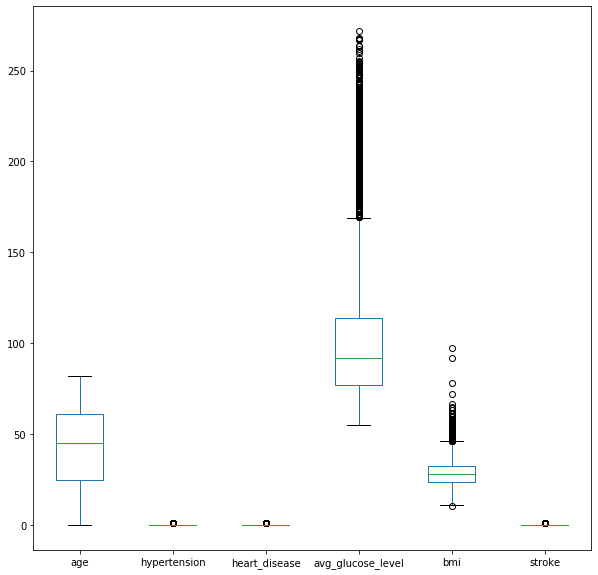

In [12]:
data.plot(kind = 'box')
plt.show()

## Label Encoding

In [13]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [14]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [15]:
data['gender'] = enc.fit_transform(data['gender'])
data['ever_married'] = enc.fit_transform(data['ever_married'])
data['work_type'] = enc.fit_transform(data['work_type'])
data['Residence_type'] = enc.fit_transform(data['Residence_type'])
data['avg_glucose_level'] = enc.fit_transform(data['avg_glucose_level'])
data['smoking_status'] = enc.fit_transform(data['smoking_status'])

In [16]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,3850,36.600000,1,1
1,0,61.0,0,0,1,3,0,3588,28.893237,2,1
2,1,80.0,0,1,1,2,0,2483,32.500000,2,1
3,0,49.0,0,0,1,2,1,3385,34.400000,3,1
4,0,79.0,1,0,1,3,0,3394,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,1360,28.893237,2,0
5106,0,81.0,0,0,1,3,1,3030,40.000000,2,0
5107,0,35.0,0,0,1,3,0,1314,30.600000,2,0
5108,1,51.0,0,0,1,2,0,3363,25.600000,1,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   int64  
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int32(5), int64(4)
memory usage: 339.5 KB


# Partitioning

In [18]:
# Splitting the data for train and test

In [19]:
X = data.drop('stroke', axis = 1)
Y = data['stroke']


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [21]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,452,31.400000,2
5085,0,72.0,0,0,1,2,1,1371,33.100000,1
1593,1,31.0,0,0,1,2,1,650,25.800000,2
1324,0,80.0,0,0,1,0,1,1429,28.893237,0
123,1,56.0,1,0,1,2,0,3953,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,2828,33.900000,1
599,0,59.0,1,0,1,2,1,3612,30.800000,2
1361,0,59.0,0,0,1,2,1,1713,28.100000,0
1547,1,59.0,0,1,1,3,0,3507,30.400000,0


In [22]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,2875,17.1,2
4017,0,44.0,0,0,1,2,0,2644,30.5,3
744,0,71.0,1,0,1,2,1,3505,31.6,2
1799,1,34.0,0,0,1,2,1,2567,22.2,0
2314,1,82.0,0,0,1,2,1,1705,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,3156,32.2,0
4641,0,45.0,0,0,1,0,0,1437,35.4,0
1320,0,58.0,0,1,1,2,0,3226,26.0,3
1098,0,77.0,0,0,1,2,0,849,22.0,0


In [23]:
Y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [24]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

## Normalization

In [25]:
# Scale down to a particular range

In [26]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,1883.219961,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,1104.935189,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,969.250000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1811.500000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2786.000000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3978.000000,97.600000,3.000000,1.000000


In [27]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [28]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [29]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -1.29976113,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.47027517,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -1.12104707,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.16158725,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.45767043,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -1.46222845,
        -0.70944717,  0.58675012]])

## Training

### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [31]:
dt.fit(X_train_std, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
dt.feature_importances_

array([0.03740214, 0.15662648, 0.02529917, 0.01742903, 0.00834786,
       0.02989116, 0.05732824, 0.34127293, 0.25990179, 0.0665012 ])

In [33]:
Y_pred = dt.predict(X_test_std)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
ac_dt = accuracy_score(Y_test, Y_pred)

In [36]:
ac_dt

0.9070450097847358

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [38]:
lr.fit(X_train_std, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
Y_pred = lr.predict(X_test_std)

In [40]:
ac_lr = accuracy_score(Y_test, Y_pred)

In [41]:
ac_lr

0.9471624266144814

### KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [43]:
knn.fit(X_train_std, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
Y_pred_knn = knn.predict(X_test_std)

In [45]:
ac_knn = accuracy_score(Y_test, Y_pred_knn)

In [46]:
ac_knn

0.9471624266144814

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [48]:
rf.fit(X_train_std, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
Y_pred_rf = rf.predict(X_test_std)

In [50]:
Y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
ac_rf = accuracy_score(Y_test, Y_pred_rf)

In [52]:
ac_rf

0.9452054794520548

### SVM

In [53]:
from sklearn.svm import SVC
sv = SVC()

In [54]:
sv.fit(X_train_std, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
Y_pred_sv = sv.predict(X_test_std)

In [56]:
ac_sv = accuracy_score(Y_test, Y_pred_sv)

In [57]:
ac_sv

0.9471624266144814

## Ploting

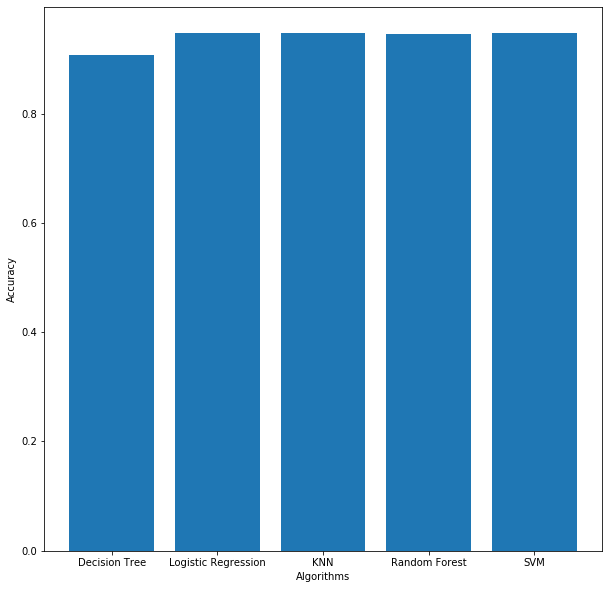

In [58]:
plt.bar(['Decision Tree', 'Logistic Regression', 'KNN', 'Random Forest', 'SVM'], [ac_dt, ac_lr, ac_knn, ac_rf, ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()